Task-3: Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

Data Used: https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:08<00:00, 35.9MB/s]
100% 812M/812M [00:08<00:00, 98.3MB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
import zipfile
zip = zipfile.ZipFile('test1.zip')
zip.extractall()
zip.close()

In [62]:
import cv2
import os
import pandas as pd
import numpy as np
import random
from skimage.feature import hog
from sklearn import svm

In [63]:
training_path = '/content/train'

i = 0

categories = []
imgs_names = []
features = []
for filename in os.listdir(training_path):
    imgs_names.append(filename)
    if 'dog' in filename:
        categories.append(1)
    else:
        categories.append(0)
    img = cv2.imread(os.path.join(training_path, filename))
    resized_img = cv2.resize(img, (128, 64))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(gray_img, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, channel_axis=None)
    features.append(fd)
    i += 1
    if i == 3000:
        break


array([[[ 93,  83,  66],
        [ 88,  78,  61],
        [ 86,  76,  59],
        ...,
        [105, 100,  85],
        [104, 100,  82],
        [104, 100,  82]],

       [[ 91,  81,  64],
        [ 87,  77,  60],
        [ 87,  77,  60],
        ...,
        [105,  98,  83],
        [103,  99,  81],
        [105,  98,  81]],

       [[ 89,  79,  62],
        [ 87,  77,  60],
        [ 90,  80,  63],
        ...,
        [104,  97,  82],
        [104,  97,  80],
        [105,  97,  80]],

       ...,

       [[ 76,  67,  57],
        [ 79,  70,  60],
        [ 81,  72,  62],
        ...,
        [ 20,  43,  29],
        [ 22,  42,  29],
        [ 27,  47,  35]],

       [[ 78,  69,  59],
        [ 80,  71,  61],
        [ 82,  73,  63],
        ...,
        [ 34,  52,  39],
        [ 21,  38,  27],
        [ 11,  26,  18]],

       [[ 81,  72,  62],
        [ 81,  72,  62],
        [ 82,  73,  63],
        ...,
        [ 38,  54,  43],
        [ 21,  36,  28],
        [  6,  18,  12]]], dtype=uint8)
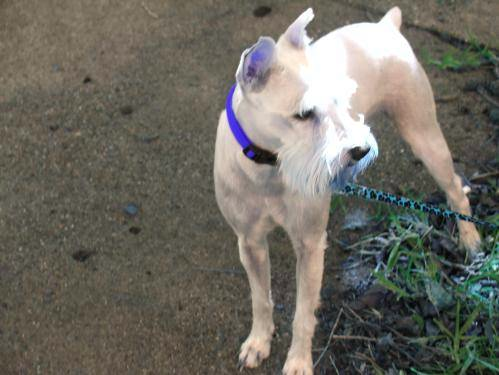

In [64]:
img

array([[[ 89,  79,  62],
        [101,  92,  75],
        [106,  96,  79],
        ...,
        [ 95,  87,  73],
        [106,  98,  85],
        [105,  98,  82]],

       [[102,  92,  75],
        [108,  98,  81],
        [119, 109,  92],
        ...,
        [122, 114, 101],
        [114, 106,  93],
        [116, 103,  87]],

       [[107,  97,  80],
        [110, 100,  83],
        [115, 105,  88],
        ...,
        [ 99,  91,  78],
        [107,  99,  86],
        [107, 101,  85]],

       ...,

       [[ 85,  77,  64],
        [ 80,  72,  59],
        [ 85,  77,  64],
        ...,
        [ 39,  68,  49],
        [ 61,  89,  57],
        [ 55,  79,  60]],

       [[ 77,  69,  56],
        [ 78,  70,  57],
        [ 99,  91,  78],
        ...,
        [ 81, 130, 113],
        [ 70, 122, 102],
        [ 28,  73,  37]],

       [[ 79,  70,  60],
        [ 73,  64,  54],
        [ 76,  67,  57],
        ...,
        [ 20,  32,  22],
        [ 27,  56,  36],
        [ 26,  49,  35]]], dtype=uint8)
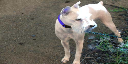

In [65]:
resized_img

array([[ 75,  88,  92, ...,  84,  95,  94],
       [ 88,  94, 105, ..., 111, 103, 100],
       [ 93,  96, 101, ...,  88,  96,  97],
       ...,
       [ 74,  69,  74, ...,  59,  76,  71],
       [ 66,  67,  88, ..., 119, 110,  57],
       [ 68,  62,  65, ...,  28,  47,  42]], dtype=uint8)
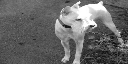

In [67]:
gray_img

In [68]:
hog_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
len(categories)

3000

In [70]:
len(features)

3000

In [73]:
X = features
Y = categories


C = 0.1  # SVM regularization parameter
svc = svm.SVC(kernel='poly', C=C).fit(X, Y)

In [74]:
predictions = svc.predict(X)

In [75]:
accuracy = np.mean(predictions == Y)
accuracy

0.951

In [77]:
i = 0

test_names = []
test_features = []
test_categories = []
for filename in os.listdir(training_path):
    if(i > 3000):
        test_names.append(filename)
        if 'dog' in filename:
            test_categories.append(1)
        else:
            test_categories.append(0)
        # read the image
        img = cv2.imread(os.path.join(training_path, filename))
        # resize the image
        resized_img = cv2.resize(img, (128, 64))
        # extract the features using HOG
        fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8),
                          cells_per_block = (2, 2), visualize = True, channel_axis=-1)
        # append the feature array to the list of features
        test_features.append(fd)

    i += 1

    if i == 5000:
        break

array([[[170, 171, 151],
        [200, 201, 181],
        [197, 196, 176],
        ...,
        [  3,  31,  48],
        [  8,  37,  52],
        [ 16,  42,  49]],

       [[171, 172, 152],
        [200, 201, 181],
        [197, 196, 176],
        ...,
        [  0,  23,  40],
        [  2,  28,  45],
        [  7,  30,  45]],

       [[169, 170, 150],
        [195, 196, 176],
        [194, 193, 173],
        ...,
        [  0,  22,  38],
        [  1,  25,  45],
        [  0,  16,  41]],

       ...,

       [[ 52,  66,  65],
        [ 53,  67,  66],
        [ 55,  69,  67],
        ...,
        [211, 221, 245],
        [211, 221, 245],
        [212, 222, 246]],

       [[ 51,  65,  64],
        [ 52,  66,  65],
        [ 55,  69,  67],
        ...,
        [210, 220, 244],
        [210, 220, 244],
        [210, 220, 244]],

       [[ 49,  63,  62],
        [ 51,  65,  64],
        [ 54,  68,  66],
        ...,
        [208, 218, 242],
        [208, 218, 242],
        [209, 219, 243]]], dtype=uint8)
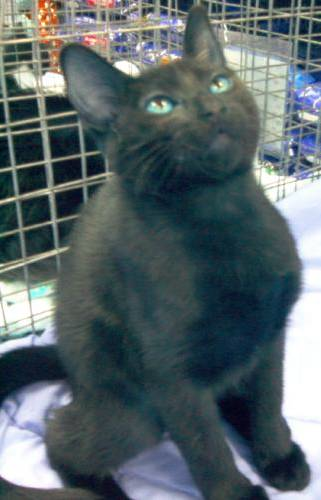

In [78]:
img

array([[[180, 182, 161],
        [185, 182, 163],
        [188, 181, 164],
        ...,
        [ 52,  69,  69],
        [ 13,  28,  38],
        [  9,  25,  42]],

       [[187, 190, 164],
        [182, 181, 156],
        [190, 186, 164],
        ...,
        [105, 109,  96],
        [127, 136, 122],
        [146, 153, 138]],

       [[201, 196, 171],
        [179, 175, 150],
        [201, 198, 177],
        ...,
        [175, 187, 176],
        [175, 192, 180],
        [143, 159, 143]],

       ...,

       [[ 65,  69,  79],
        [ 76,  77,  87],
        [141, 134, 147],
        ...,
        [211, 217, 239],
        [226, 230, 248],
        [228, 233, 249]],

       [[ 24,  56,  55],
        [ 35,  62,  62],
        [ 41,  59,  62],
        ...,
        [226, 233, 253],
        [231, 235, 253],
        [232, 235, 250]],

       [[ 46,  68,  66],
        [ 51,  70,  67],
        [ 56,  70,  68],
        ...,
        [223, 229, 247],
        [218, 224, 245],
        [217, 222, 247]]], dtype=uint8)
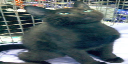

In [79]:
resized_img

In [80]:
hog_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
test_X = test_features
test_Y = test_categories

C = 0.1  # SVM regularization parameter
svc = svm.SVC(kernel='poly', C=C).fit(test_X, test_Y)
test_predictions = svc.predict(test_X)

In [82]:
accuracy = np.mean(test_predictions == test_Y)
accuracy

0.9649824912456229